# "Maximizing Profits By Analyzing Key Performance Factors in Start-Ups"

## Problem Description
We have a dataset of 50 start-up companies. This dataset contains five main information: R&D Spend,AdministrationSpend,Marketing
Spend, State, and Profit for a financial year. Our goal is to create a
model that can easily determine which company has a maximum profit, and which is the most affecting factor for the profit of a company.
Since we need to find the Profit, so it is the dependent variable, and the other four variables are independent variables. Below are the main steps of deploying the MLR model:
1. Data Pre-processing Steps.
2. Fitting the MLR model to the training set.
3. Predicting the result of test set.
4. Evaluate the Algorithm.

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving LinkedIn Banner.jpg to LinkedIn Banner (1).jpg


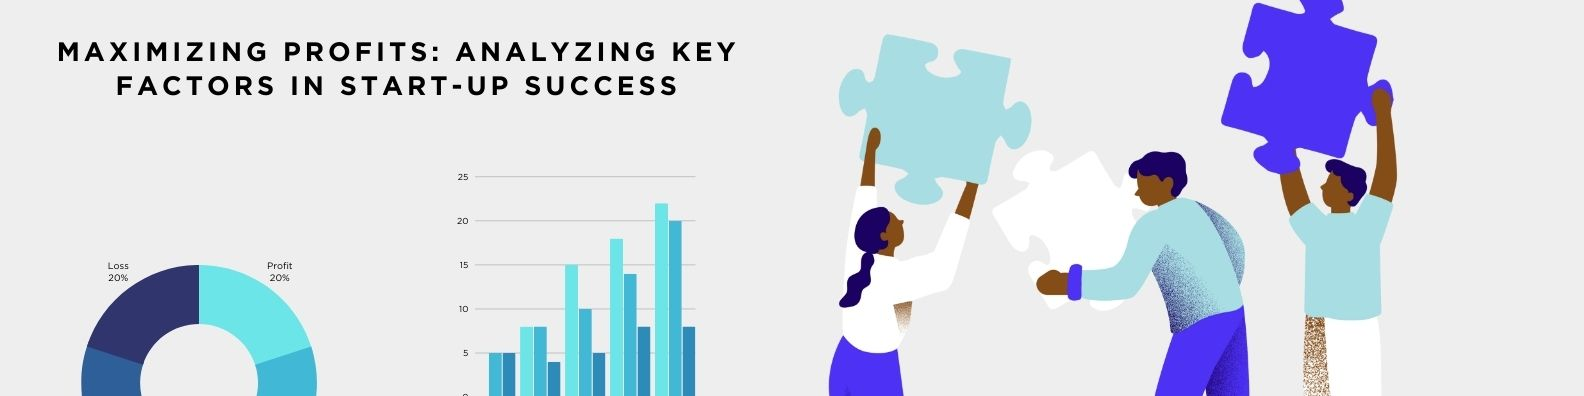

In [ ]:
Image('LinkedIn Banner.jpg')

## 1.Data Pre-processing Steps

### 1.a) Importing Libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.b) Importing Dataset

In [ ]:
# Importing Dataset
data_set = pd.read_csv("50_CompList.csv")

In [ ]:
data_set.to_string()
data_set.head(6)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12


### 1.c) Extracting Dependent and Independent Variable

In [ ]:
#Extracting Independent and dependent Variable
X = data_set.iloc[:,0:4].values
y = data_set.iloc[:,4].values

In [ ]:
print(X[:10])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']]


- As we can see in the above output, the last column contains categoricalvariables which are not suitable to apply directly for fitting the model. So we need to encode this.

### 1.d) Encoding Categorical Data

In [ ]:
# Categorical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
labelencoder_x = LabelEncoder()
X[:,3] = labelencoder_x.fit_transform(X[:,3])
dt = pd.DataFrame(X)
print("--------------------------------------------")
print(dt.to_string())
print("--------------------------------------------")

--------------------------------------------
            0          1          2  3
0    165349.2   136897.8   471784.1  2
1    162597.7  151377.59  443898.53  0
2   153441.51  101145.55  407934.54  1
3   144372.41  118671.85  383199.62  2
4   142107.34   91391.77  366168.42  1
5    131876.9   99814.71  362861.36  2
6   134615.46  147198.87  127716.82  0
7   130298.13  145530.06  323876.68  1
8   120542.52  148718.95  311613.29  2
9   123334.88  108679.17  304981.62  0
10  101913.08  110594.11  229160.95  1
11  100671.96   91790.61  249744.55  0
12   93863.75  127320.38  249839.44  1
13   91992.39  135495.07  252664.93  0
14  119943.24  156547.42  256512.92  1
15  114523.61  122616.84  261776.23  2
16   78013.11  121597.55  264346.06  0
17   94657.16  145077.58  282574.31  2
18   91749.16  114175.79  294919.57  1
19    86419.7  153514.11        0.0  2
20   76253.86   113867.3  298664.47  0
21   78389.47  153773.43  299737.29  2
22   73994.56  122782.75  303319.26  1
23   67532.53  1057

In [ ]:
# Column Transform
ct = ColumnTransformer([("State", OneHotEncoder(),[3])], remainder = 'passthrough')

In [ ]:
X = ct.fit_transform(X)

In [ ]:
dt1 = pd.DataFrame(X)
print("Before Removing the Dummy Variable Trap")
print("------------------------------------------------------")
print(dt1.to_string())
print("------------------------------------------------------")

Before Removing the Dummy Variable Trap
------------------------------------------------------
      0    1    2          3          4          5
0   0.0  0.0  1.0   165349.2   136897.8   471784.1
1   1.0  0.0  0.0   162597.7  151377.59  443898.53
2   0.0  1.0  0.0  153441.51  101145.55  407934.54
3   0.0  0.0  1.0  144372.41  118671.85  383199.62
4   0.0  1.0  0.0  142107.34   91391.77  366168.42
5   0.0  0.0  1.0   131876.9   99814.71  362861.36
6   1.0  0.0  0.0  134615.46  147198.87  127716.82
7   0.0  1.0  0.0  130298.13  145530.06  323876.68
8   0.0  0.0  1.0  120542.52  148718.95  311613.29
9   1.0  0.0  0.0  123334.88  108679.17  304981.62
10  0.0  1.0  0.0  101913.08  110594.11  229160.95
11  1.0  0.0  0.0  100671.96   91790.61  249744.55
12  0.0  1.0  0.0   93863.75  127320.38  249839.44
13  1.0  0.0  0.0   91992.39  135495.07  252664.93
14  0.0  1.0  0.0  119943.24  156547.42  256512.92
15  0.0  0.0  1.0  114523.61  122616.84  261776.23
16  1.0  0.0  0.0   78013.11  121597.5

In [ ]:
# Avoiding dummy variable trap
print("After Removing the Dummy Variable Trap")
print("--------------------------------------------------")
X = X[:, 1:]
dt2 = pd.DataFrame(X)
print("Updated X=")
print(dt2.to_string())

After Removing the Dummy Variable Trap
--------------------------------------------------
Updated X=
      0    1          2          3          4
0   0.0  1.0   165349.2   136897.8   471784.1
1   0.0  0.0   162597.7  151377.59  443898.53
2   1.0  0.0  153441.51  101145.55  407934.54
3   0.0  1.0  144372.41  118671.85  383199.62
4   1.0  0.0  142107.34   91391.77  366168.42
5   0.0  1.0   131876.9   99814.71  362861.36
6   0.0  0.0  134615.46  147198.87  127716.82
7   1.0  0.0  130298.13  145530.06  323876.68
8   0.0  1.0  120542.52  148718.95  311613.29
9   0.0  0.0  123334.88  108679.17  304981.62
10  1.0  0.0  101913.08  110594.11  229160.95
11  0.0  0.0  100671.96   91790.61  249744.55
12  1.0  0.0   93863.75  127320.38  249839.44
13  0.0  0.0   91992.39  135495.07  252664.93
14  1.0  0.0  119943.24  156547.42  256512.92
15  0.0  1.0  114523.61  122616.84  261776.23
16  0.0  0.0   78013.11  121597.55  264346.06
17  0.0  1.0   94657.16  145077.58  282574.31
18  1.0  0.0   91749.16  

### 1.e) Splitting the dataset into training and test set

In [ ]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## 2. Fitting the MLR model to the training set

In [ ]:
# Fitting the MLR model to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## 3. Predicting the Test Result

In [ ]:
# Predicting the Test set result
y_pred = regressor.predict(X_test)

In [ ]:
# To compare the actual output values for X_test with the predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.round(2)
print(df.to_string())

      Actual  Predicted
0  134307.35  126362.88
1   81005.76   84608.45
2   99937.59   99677.49
3   64926.08   46357.46
4  125370.37  128750.48
5   35673.41   50912.42
6  105733.54  109741.35
7  107404.34  100643.24
8   97427.84   97599.28
9  122776.86  113097.43


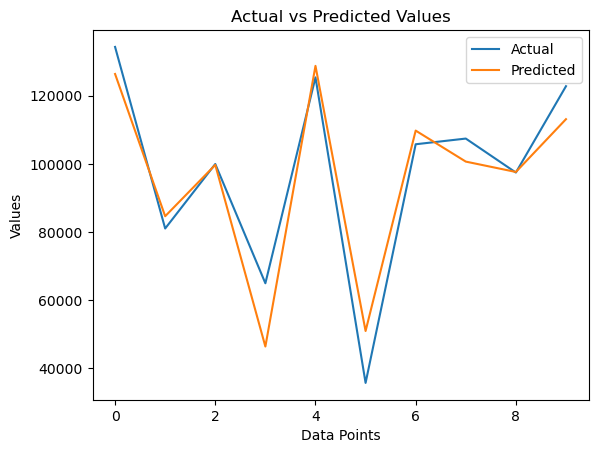

In [ ]:
# Plot the actual data and predicted data
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
# Description of the dataset
print("Mean")
print("----")
print(data_set.describe().round(2))

Mean
----
       R&D Spend  Administration  Marketing Spend     Profit
count      50.00           50.00            50.00      50.00
mean    73721.62       121344.64        211025.10  112012.64
std     45902.26        28017.80        122290.31   40306.18
min         0.00        51283.14             0.00   14681.40
25%     39936.37       103730.88        129300.13   90138.90
50%     73051.08       122699.80        212716.24  107978.19
75%    101602.80       144842.18        299469.08  139765.98
max    165349.20       182645.56        471784.10  192261.83


## 4. Evaluate the Algorithm

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))

Mean Absolute Error: 6961.48
Mean Squared Error: 82010363.05
Root Mean Squared Error: 9055.96


- You can see that the value of root mean squared error is 9055.96,
which is less than 10% of the mean value
of the expenses in all states. This means that our algorithm is very
accurate and good predictions.

In [ ]:
# Predicting the accuracy score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
r_score = score*100
print("Accuracy socre is ",r_score.round(2),"%")

Accuracy socre is  89.87 %
